#### 1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br>
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy. Полученные значения должны быть равны.<br>
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [2]:
m3=np.mean(zp*ks)
m1=zp.mean()
m2=ks.mean()
print("m1 =", m1, "; m2 =", m2, "; m3 =", m3)

m1 = 101.4 ; m2 = 709.9 ; m3 = 81141.7


In [3]:
cov = np.mean(zp*ks) - zp.mean() * ks.mean()
round(cov, 2)

9157.84

In [4]:
np.cov(zp,ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [5]:
s1=zp.std()
s2=ks.std()
print("s1 =", s1, "; s2 =", s2)

s1 = 59.115480206118605 ; s2 = 174.55340157098058


In [6]:
r = cov / (zp.std() * ks.std())
r

0.8874900920739158

In [7]:
np.corrcoef(zp,ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [8]:
data = pd.DataFrame({"Зарплата":zp, "К.скоринг":ks})
data.corr()

,Зарплата,К.скоринг
Зарплата,1.00000,0.88749
К.скоринг,0.88749,1.00000


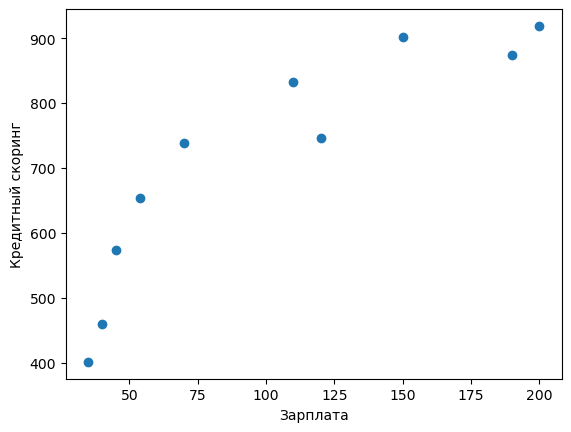

In [9]:
plt.scatter(zp,ks)
plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг', rotation=90)
plt.show()

При расчете вручную ковариация равна 9157.84, что соответствует значению смещенной ковариации, расчитанной по формуле из numpy.<br>
Поделим смещенную ковариацию на произведение смещенных же стандартных отклонений и получим коэффициент корреляции Пирсона = 0.88749, что и в результатах выдачи функции numpy.corrcoef() и метода corr() в pandas.<br>
Довольно сильная корреляция (почти 0.89 из 1.00): значит с большой вероятностью существует сильная линейная зависимость между исходными данными.


#### 2. Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.<br>
Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [10]:
X=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
a=0.05
n=len(X)
x=X.mean()
s = X.std(ddof=1)
t = stats.t.ppf((1-a/2), n-1)
x1 = x - t * (s / np.sqrt(n))
x2 = x + t * (s / np.sqrt(n))
print("доверительный интервал [", round(x1,3), ":", round(x2,3), "]")

доверительный интервал [ 110.556 : 125.644 ]


#### 3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95

In [11]:
d=25
n=27
x=174.2
a=0.05
z=1.96
x1=x-z*(np.sqrt(d/n))
x2=x+z*(np.sqrt(d/n))
print("доверительный интервал [", round(x1,3), ":", round(x2,3), "]")

доверительный интервал [ 172.314 : 176.086 ]
